Initial analysis of the annotated data

In [12]:
import matplotlib.pyplot as plt
import os 
import pandas as pd


DATA_PATH = os.path.join(os.getcwd(), "..", "data")

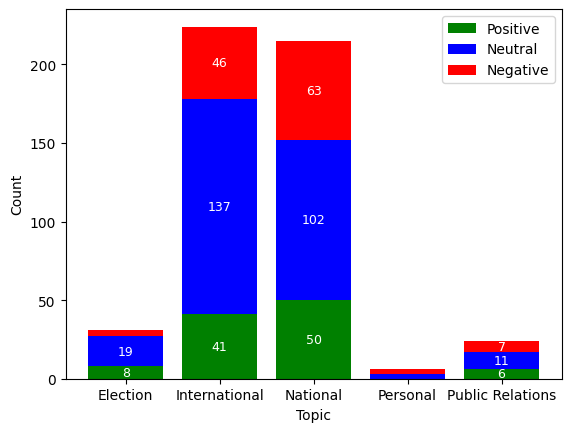

In [ ]:
df = pd.read_csv(os.path.join(DATA_PATH, "articles", "final_annotated_articles.tsv"), sep="\t", index_col=0)

topics = df['open_coding_topic'].unique()
topics.sort()
count_pos = []
count_neutral = []
count_neg = []
for topic in topics:
    count_pos.append(len(df[(df["open_coding_topic"] == topic) & (df["sentiment"] == "Positive")]))
    count_neutral.append(len(df[(df["open_coding_topic"] == topic) & (df["sentiment"] == "Neutral")]))
    count_neg.append(len(df[(df["open_coding_topic"] == topic) & (df["sentiment"] == "Negative")]))

bar1 = plt.bar(topics, count_pos, label='Positive', color="green")
bar2 = plt.bar(topics, count_neutral, bottom=count_pos, label='Neutral', color="blue")
bar3 = plt.bar(topics, count_neg, bottom=[i+j for i, j in zip(count_pos, count_neutral)], label='Negative', color="red")

for bar in [bar1, bar2, bar3]:
    for sub_bar in bar.patches:
        height = sub_bar.get_height()
        if height == 0:
            continue
        x = sub_bar.get_x() + sub_bar.get_width() / 2
        if height > 5:
            # Label inside
            y = sub_bar.get_y() + height / 2
            plt.text(x, y, str(int(height)), ha='center', va='center', fontsize=9, color='white')

plt.xlabel("Topic")
plt.ylabel("Count")
plt.legend()
plt.show()